In [1]:
 #LETS WORK WITH CIFAR 10 DATA 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!nvidia-smi

Sat Mar 13 13:22:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!cat /proc/meminfo

MemTotal:       13333568 kB
MemFree:        10574272 kB
MemAvailable:   12461572 kB
Buffers:           85848 kB
Cached:          1944976 kB
SwapCached:            0 kB
Active:           993492 kB
Inactive:        1450804 kB
Active(anon):     382100 kB
Inactive(anon):      364 kB
Active(file):     611392 kB
Inactive(file):  1450440 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              3568 kB
Writeback:             0 kB
AnonPages:        413688 kB
Mapped:           244056 kB
Shmem:              1012 kB
Slab:             177816 kB
SReclaimable:     132504 kB
SUnreclaim:        45312 kB
KernelStack:        4688 kB
PageTables:         5988 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666784 kB
Committed_AS:    3210768 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:             1040 kB
AnonHugePages:   

#ABOUT CIFAR 10 

It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

#How to get Images 

 we have  a package called torchvision, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., torchvision.datasets and torch.utils.data.DataLoader.

 

In [5]:
#STEP 1 : LOAD CIFAR 10 DATA


In [6]:
#SECTION1 REQUIRED LIBRARY 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import torchvision


In [7]:
#DOWNLOAD THE IMAGES 

class Args:

    # Data Loading
    # ============

    train_batch_size = 64
    val_batch_size = 64
    batch_size=128
    num_workers = 4

    # Regularization
    # ==============
    dropout = 0.1
    dropout = 0

    # Training
    # ========
    random_seed = 1
    epochs = 50
    learning_rate = 0.01
    momentum = 0.9


In [8]:
import torchvision.transforms as transforms
def calculate_mean_std(dataset):
  loader = torch.utils.data.DataLoader(dataset,
                          batch_size=128,
                          num_workers=0,
                          shuffle=False)

  mean = 0.
  std = 0.
  for images, _ in loader:
      batch_samples = images.size(0) # batch size (the last batch can have smaller size!)
      images = images.view(batch_samples, images.size(1), -1)
      mean += images.mean(2).sum(0)
      std += images.std(2).sum(0)

  mean /= len(loader.dataset)
  std /= len(loader.dataset)
  mean=mean.tolist()
  std=std.tolist()
  return mean,std 
trainset = torchvision.datasets.CIFAR10(root='./data',download=True,transform=transforms.ToTensor())
mean,std = calculate_mean_std(trainset)




Extracting ./data/cifar-10-python.tar.gz to ./data


In [9]:
# mean =[0.5,0.5,0.5]
# std =[0.5,0.5,0.5]

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms


train_transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize(mean, std)
])
test_transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize(mean, std)
])

train = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=train_transform)
test = torchvision.datasets.CIFAR10('./data', train=False, download=True, transform=test_transform)
SEED = 1
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
# For reproducibility
torch.manual_seed(SEED)
if cuda:
    torch.cuda.manual_seed(SEED)
# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=Args.batch_size, num_workers=Args.num_workers, pin_memory=True) if cuda else dict(shuffle=True, batch_size=Args.batch_size)
# train dataloader
trainloader = torch.utils.data.DataLoader(train, **dataloader_args)
# test dataloader
testloader = torch.utils.data.DataLoader(test, **dataloader_args)

################

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

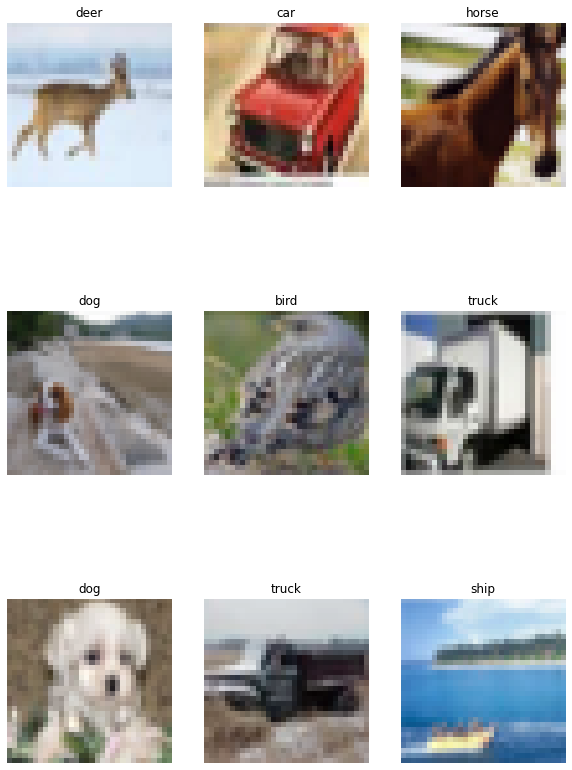

In [11]:
import math 
import matplotlib.pyplot as plt
import numpy as np

def plot_n_image(number,trainloader,classes,mean,std,format):
    # get some random training images
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    nrows = math.floor(math.sqrt(number))
    ncols = math.ceil(math.sqrt(number))

    fig, ax = plt.subplots(nrows, ncols, figsize=(10, 15))

    for i in range(nrows):
        for j in range(ncols):
            index = i * ncols + j
            ax[i, j].axis("off")
            ax[i, j].set_title(classes[labels[index]])
            #FIRST UNNORMALIZE THEN SHOW 
            mean = np.array(mean)
            std = np.array(std)
            if format=='raw':
              ax[i, j].imshow(np.transpose(images[index].cpu().numpy(), (1, 2, 0))*std+mean, cmap="gray_r")
            elif format=='normalized':
              ax[i, j].imshow(np.transpose(images[index].cpu().numpy(), (1, 2, 0)), cmap="gray_r")
    

plot_n_image(9,trainloader,classes,mean,std,format='raw')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

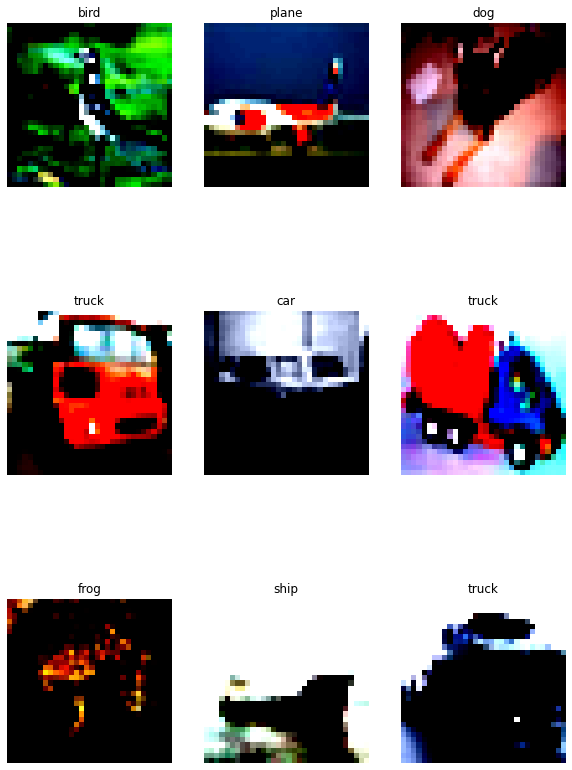

In [12]:
#PLOT A BATCH OF NORMALIZED IMAGE 
plot_n_image(9,trainloader,classes,mean,std,format='normalized')

In [13]:
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
class_count = {}
for _, index in dataset:
    label = classes[index]
    if label not in class_count:
        class_count[label] = 0
    class_count[label] += 1
class_count

Files already downloaded and verified


{'bird': 5000,
 'car': 5000,
 'cat': 5000,
 'deer': 5000,
 'dog': 5000,
 'frog': 5000,
 'horse': 5000,
 'plane': 5000,
 'ship': 5000,
 'truck': 5000}

In [14]:
class Net(nn.Module):

    def __init__(self):
        """ This function instantiates all the model layers """

        super(Net, self).__init__()
        dropout_rate=0
        self.convblock1 = nn.Sequential(
            # Input: 32x32x3 | Output: 32x32x32 | RF: 3x3
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),  
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_rate),

            # Input: 32x32x32 | Output: 32x32x64 | RF: 5x5
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(dropout_rate)
        )

        self.transblock1 = nn.Sequential(
            # Input: 32x32x64 | Output: 16x16x64 | RF: 6x6
            nn.MaxPool2d(2, 2),  
            # Input: 16x16x64 | Output: 16x16x32 | RF: 6x6
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=1)  
        )

        self.convblock2 = nn.Sequential(
            # Input: 16x16x32 | Output: 16x16x32 | RF: 10x10
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),  
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_rate),

            # Input: 16x16x32 | Output: 16x16x64 | RF: 14x14
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1), 
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(dropout_rate)
        )

        self.transblock2 = nn.Sequential(
            # Input: 16x16x64 | Output: 8x8x64 | RF: 16x16
            nn.MaxPool2d(2, 2),  
            # Input: 8x8x64 | Output: 8x8x32 | RF: 16x16
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=1)  
        )

        self.convblock3 = nn.Sequential(
             # Input: 8x8x32 | Output: 8x8x32 | RF: 24x24
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1), 
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_rate),

            # Depthwise separable convolution
            # Input: 8x8x32 | Output: 8x8x32 | RF: 32x32
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, groups=32, padding=1), 
             # Input: 8x8x32 | Output: 8x8x64 | RF: 32x32 
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1), 
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(dropout_rate)
        )

        self.transblock3 = nn.Sequential(
            nn.MaxPool2d(2, 2),  # Input: 8x8x64 | Output: 4x4x64 | RF: 36x36
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=1)  # Input: 4x4x64 | Output: 4x4x32 | RF: 36x36
        )

        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
              # Input: 4x4x32 | Output: 4x4x32 | RF: 52x52
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_rate),

            # Dilated convolution
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1, dilation=2),
            # Input: 4x4x32 | Output: 2x2x64 | RF: 68X68
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(dropout_rate)
        )

        self.gap = nn.Sequential(
            #Input 2X2X64 |Output  1X1X64 | RF :76X 76
            nn.AvgPool2d(kernel_size=2),
            #Input 1X1X64 | Output 1X1X10 | RF :76 X76
            nn.Conv2d(in_channels=64,out_channels=10,kernel_size=(1,1),padding = 0, bias = True)
            #nn.AdaptiveAvgPool2d(1)
           
        ) 


        
    
    def forward(self, x):
        """ This function defines the network structure """

        x = self.convblock1(x)
        x = self.transblock1(x)
        x = self.convblock2(x)
        x = self.transblock2(x)
        x = self.convblock3(x)
        x = self.transblock3(x)
        x = self.convblock4(x)
        x = self.gap(x)
        x = x.view(-1, 10)
        #x = self.fc(x)
        return x




In [15]:
# import torch.nn as nn

# class Net1(nn.Module):
#     def __init__(self, args):
#         super(Net, self).__init__()

#         self.layer1 = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), padding=1, bias=False),
#             nn.ReLU(),
#             nn.BatchNorm2d(32),
#             nn.Dropout(args.dropout_value),  # In: 32x32x3 | Out: 32x32x32 | RF: 3x3

#             nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), padding=1, bias=False),
#             nn.ReLU(),
#             nn.BatchNorm2d(32), # In: 32x32x32 | Out: 32x32x32 | RF: 5x5
#         )
#         self.pool1 = nn.MaxPool2d(2, 2) # In: 32x32x32 | Out: 16x16x32 | RF: 6x6
#         self.layer2 = nn.Sequential(
#             nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.Dropout(args.dropout_value),  # In: 16x16x32 | Out: 16x16x64 | RF: 10x10

#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
#             nn.ReLU(),
#             nn.BatchNorm2d(64), # In: 16x16x64 | Out: 16x16x64 | RF: 14x14
#         )
#         self.pool2 = nn.MaxPool2d(2, 2) # In: 16x16x64 | Out: 8x8x64 | RF:16x16
#         self.layer3 = nn.Sequential(
#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, groups=64, bias=False),
#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(1, 1), padding=0, bias=False),
#             nn.ReLU(),
#             nn.BatchNorm2d(64),
#             nn.Dropout(args.dropout_value),  # In: 8x8x64 | Out: 8x8x64 | RF: 24x24

#             nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1, bias=False),
#             nn.ReLU(),
#             nn.BatchNorm2d(64), # In: 8x8x64 | Out: 8x8x64 | RF: 32x32
#         )
#         self.pool3 = nn.MaxPool2d(2, 2) # In: 8x8x64 | Out: 4x4x64 | RF: 36x36
#         self.layer4 = nn.Sequential(
#             nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=1, dilation=2, bias=False),
#             nn.ReLU(),
#             nn.BatchNorm2d(128),
#             nn.Dropout(args.dropout_value),  # In: 4x4x64 | Out: 4x4x128 | RF: 68x68

#             nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), padding=1, bias=False),
#             nn.ReLU(),
#             nn.BatchNorm2d(128),  # In: 4x4x128 | Out: 4x4x128 | RF: 84x84
#         )
#         self.gap = nn.AdaptiveAvgPool2d(output_size=1)  # In: 4x4x128 | Out: 1x1x128 | RF: 108x108
#         self.layer5 = nn.Sequential(
#             nn.Linear(in_features=128, out_features=10),
#             # nn.ReLU() NEVER!
#         )

#     def forward(self, x):
#         x = self.layer1(x)
#         x = self.pool1(x)
#         x = self.layer2(x)
#         x = self.pool2(x)
#         x = self.layer3(x)
#         x = self.pool3(x)
#         x = self.layer4(x)
#         x = self.gap(x)
#         x = x.view(-1, 128)
#         x = self.layer5(x)
#         return x

In [16]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
#model = Net().to(device) 
model = Net().to(device) 
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
         MaxPool2d-9           [-1, 64, 16, 16]               0
           Conv2d-10           [-1, 32, 16, 16]           2,080
           Conv2d-11           [-1, 32, 16, 16]           9,248
             ReLU-12           [-1, 32, 16, 16]               0
      BatchNorm2d-13           [-1, 32, 16, 16]              64
          Dropout-14           [-1

In [17]:

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
#criterion = nn.CrossEntropyLoss()
lossfunc = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,weight_decay=0.001)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

In [18]:
from tqdm import tqdm

class Trainer():

  def __init__(self):
    self.train_losses = []
    self.test_losses = []
    self.train_acc = []
    self.test_acc = []

  def train(self, model, device, train_loader, optimizer, loss_func, epoch, lambda_l1):
    model.train()
    pbar = tqdm(train_loader)

    correct = 0
    processed = 0
    for batch_idx, (data, target) in enumerate(pbar):
      ##extra 
      running_loss = 0.0
      running_corrects = 0
      ##
      # get samples
      data, target = data.to(device), target.to(device)

      # Init
      optimizer.zero_grad()
      # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
      # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

      # Predict
      y_pred = model(data)

      # Calculate loss
      loss = loss_func(y_pred, target)
      # L2 loss

      # L1 loss
      l1 = 0
      # lambda_l1 = 0.05
      for p in model.parameters():
        l1 = l1 + p.abs().sum()
      loss = loss + lambda_l1*l1

      self.train_losses.append(loss)

      # Backpropagation
      loss.backward()
      optimizer.step()


      # Update pbar-tqdm
      
      pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
      correct += pred.eq(target.view_as(pred)).sum().item()
      processed += len(data)
      pbar.set_description(desc= f'Train set: Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
      self.train_acc.append(100*correct/processed)
      tqdm._instances.clear()

  def test(self, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    self.test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Test Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    self.test_acc.append(100. * correct / len(test_loader.dataset))

  def getValues(self):
    return (self.train_losses, self.test_losses, self.train_acc, self.test_acc)
  

In [19]:
from tqdm import tqdm

class Trainer():

  def __init__(self):
    self.train_losses = []
    self.test_losses = []
    self.train_acc = []
    self.test_acc = []

  def train(self, model, device, train_loader, optimizer, loss_func, epoch, lambda_l1):
    model.train()
    pbar = tqdm(train_loader)
    loss1=[]
    acc1=[]
    correct = 0
    processed = 0
    for batch_idx, (data, target) in enumerate(pbar):
      ##extra 
      running_loss = 0.0
      running_corrects = 0
      ##
      # get samples
      data, target = data.to(device), target.to(device)

      # Init
      optimizer.zero_grad()
      # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
      # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

      # Predict
      y_pred = model(data)

      # Calculate loss
      loss = loss_func(y_pred, target)
      # L2 loss

      # L1 loss
      l1 = 0
      # lambda_l1 = 0.05
      for p in model.parameters():
        l1 = l1 + p.abs().sum()
      loss = loss + lambda_l1*l1

      self.train_losses.append(loss)

      # Backpropagation
      loss.backward()
      optimizer.step()


      # Update pbar-tqdm
      
      pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
      correct += pred.eq(target.view_as(pred)).sum().item()
      processed += len(data)
      pbar.set_description(desc= f'Train set: Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
      self.train_acc.append(100*correct/processed)
      tqdm._instances.clear()

  def test(self, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    self.test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Test Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    self.test_acc.append(100. * correct / len(test_loader.dataset))

  def getValues(self):
    return (self.train_losses, self.test_losses, self.train_acc, self.test_acc)

  

In [20]:

EPOCHS = 15

trainer = Trainer()

for epoch in range(EPOCHS):
  # print("EPOCH:", epoch, "last LR=",scheduler.get_last_lr(), "LR = ", scheduler.get_lr())
  print("EPOCH:", epoch+1)
  # def train(model, device, train_loader, optimizer, epoch, lambda_l1):
  trainer.train(model, device, trainloader, optimizer, lossfunc, epoch, 5e-4)
  scheduler.step()
  trainer.test(model, device, testloader)
  # scheduler.step() # for StepLR

(train_losses, test_losses, train_acc, test_acc) = trainer.getValues()




  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Train set: Loss=2.112069845199585 Batch_id=390 Accuracy=51.40: 100%|██████████| 391/391 [00:21<00:00, 17.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.0265, Test Accuracy: 6121/10000 (61.21%)

EPOCH: 2


Train set: Loss=1.9625096321105957 Batch_id=390 Accuracy=65.60: 100%|██████████| 391/391 [00:22<00:00, 17.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.9107, Test Accuracy: 6361/10000 (63.61%)

EPOCH: 3


Train set: Loss=1.620896816253662 Batch_id=390 Accuracy=69.31: 100%|██████████| 391/391 [00:22<00:00, 17.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.9859, Test Accuracy: 6600/10000 (66.00%)

EPOCH: 4


Train set: Loss=1.597697377204895 Batch_id=390 Accuracy=70.82: 100%|██████████| 391/391 [00:22<00:00, 17.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.1787, Test Accuracy: 6923/10000 (69.23%)

EPOCH: 5


Train set: Loss=1.7253949642181396 Batch_id=390 Accuracy=72.50: 100%|██████████| 391/391 [00:22<00:00, 17.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.4802, Test Accuracy: 7207/10000 (72.07%)

EPOCH: 6


Train set: Loss=1.5721821784973145 Batch_id=390 Accuracy=73.34: 100%|██████████| 391/391 [00:21<00:00, 18.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.7542, Test Accuracy: 6632/10000 (66.32%)

EPOCH: 7


Train set: Loss=1.1400742530822754 Batch_id=390 Accuracy=80.58: 100%|██████████| 391/391 [00:22<00:00, 17.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.9986, Test Accuracy: 7983/10000 (79.83%)

EPOCH: 8


Train set: Loss=1.0963159799575806 Batch_id=390 Accuracy=82.82: 100%|██████████| 391/391 [00:22<00:00, 17.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.0341, Test Accuracy: 8051/10000 (80.51%)

EPOCH: 9


Train set: Loss=0.9670060873031616 Batch_id=390 Accuracy=83.66: 100%|██████████| 391/391 [00:22<00:00, 17.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.2636, Test Accuracy: 8057/10000 (80.57%)

EPOCH: 10


Train set: Loss=1.0787745714187622 Batch_id=390 Accuracy=84.34: 100%|██████████| 391/391 [00:22<00:00, 17.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.3179, Test Accuracy: 8035/10000 (80.35%)

EPOCH: 11


Train set: Loss=0.8333446979522705 Batch_id=390 Accuracy=84.34: 100%|██████████| 391/391 [00:21<00:00, 17.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.4914, Test Accuracy: 8092/10000 (80.92%)

EPOCH: 12


Train set: Loss=0.975207507610321 Batch_id=390 Accuracy=85.02: 100%|██████████| 391/391 [00:22<00:00, 17.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.5116, Test Accuracy: 8038/10000 (80.38%)

EPOCH: 13


Train set: Loss=0.8067104816436768 Batch_id=390 Accuracy=87.67: 100%|██████████| 391/391 [00:22<00:00, 17.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.6366, Test Accuracy: 8160/10000 (81.60%)

EPOCH: 14


Train set: Loss=0.9652137160301208 Batch_id=390 Accuracy=88.42: 100%|██████████| 391/391 [00:22<00:00, 17.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.6745, Test Accuracy: 8180/10000 (81.80%)

EPOCH: 15


Train set: Loss=0.8072885274887085 Batch_id=390 Accuracy=88.68: 100%|██████████| 391/391 [00:22<00:00, 17.55it/s]



Test set: Average loss: -5.6539, Test Accuracy: 8184/10000 (81.84%)



In [21]:
#modify train_acc and train_loss so that we will get one value for every epoch 
# we will avarage out every train loss and acc of every batch 

new_train_acc=[]
sum=0
count=0
for i in range (len(train_acc)):
  sum=sum+train_acc[i]
  count=count+1
  if count%len(trainloader)==0:
    new_train_acc.append(sum/len(trainloader))
    sum=0
train_acc=new_train_acc
new_train_loss=[]
sum=0
count=0
for i in range (len(train_losses)):
  sum=sum+train_losses[i]
  count=count+1
  if count%len(trainloader)==0:
    new_train_loss.append(sum/len(trainloader))
    sum=0
train_losses=new_train_loss


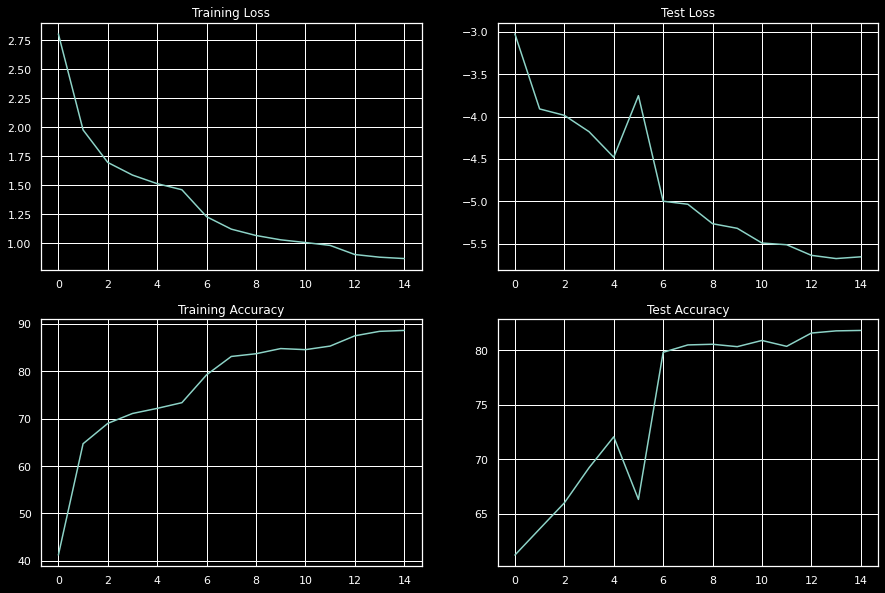

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.style.use("dark_background")

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.show()

In [23]:
torch.save(model,'./data/cifar')
model = torch.load('./data/cifar')
model.eval()

Net(
  (convblock1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0, inplace=False)
  )
  (transblock1): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
  )
  (convblock2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm

In [24]:
#GET PERCENTAGE ACCURACY FOR EACH CLASS
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for images,labels in testloader:
        #images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of plane : 81 %
Accuracy of   car : 90 %
Accuracy of  bird : 63 %
Accuracy of   cat : 76 %
Accuracy of  deer : 83 %
Accuracy of   dog : 80 %
Accuracy of  frog : 80 %
Accuracy of horse : 89 %
Accuracy of  ship : 81 %
Accuracy of truck : 78 %


In [25]:
def get_misclassified(model, test_loader, device):
  misclassified = []
  misclassified_pred = []
  misclassified_target = []
  # put the model to evaluation mode
  model.eval()
  # turn off gradients
  with torch.no_grad():
      for data, target in test_loader:
        # move them to the respective device
        data, target = data.to(device), target.to(device)
        # do inferencing
        output = model(data)
        # get the predicted output
        pred = output.argmax(dim=1, keepdim=True)

        # get the current misclassified in this batch
        list_misclassified = (pred.eq(target.view_as(pred)) == False).squeeze()
        #list_misclassified  = [item for sublist in list_misclassified  for item in sublist]
        #print(list_misclassified)
        #print(data.shape)
        batch_misclassified = data[list_misclassified]
        batch_mis_pred = pred[list_misclassified]
        batch_mis_target = target.view_as(pred)[list_misclassified]

        misclassified.append(batch_misclassified)
        misclassified_pred.append(batch_mis_pred)
        misclassified_target.append(batch_mis_target)
        #print(len(misclassified))

  # group all the batched together
  misclassified = torch.cat(misclassified)
  misclassified_pred = torch.cat(misclassified_pred)
  misclassified_target = torch.cat(misclassified_target)

  return  misclassified, misclassified_pred, misclassified_target

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


1816


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


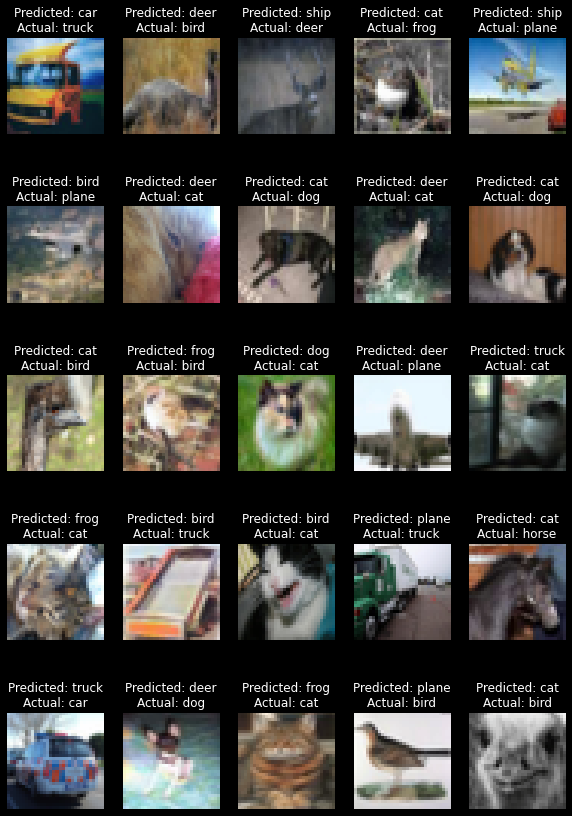

In [32]:
model = torch.load('./data/cifar')
model.eval()
import math 
mean,std = calculate_mean_std(trainset)
def plot_misclassified(number,test_loader, device,model,mean,std,format):
    image_data, predicted, actual = get_misclassified(model,testloader,device)
    print(len(image_data))
    nrows = math.floor(math.sqrt(number))
    ncols = math.ceil(math.sqrt(number))

    fig, ax = plt.subplots(nrows, ncols, figsize=(10, 15))

    for i in range(nrows):
        for j in range(ncols):
            index = i * ncols + j
            ax[i, j].axis("off")
            ax[i, j].set_title("Predicted: %s\nActual: %s" % (classes[predicted[index]], classes[actual[index]]))
            #FIRST UNNORMALIZE THEN SHOW 
            #ax[i, j].imshow(np.transpose(image_data[index].cpu().numpy()/ 2 + 0.5, (1, 2, 0)), cmap="gray_r")
            #FIRST UNNORMALIZE THEN SHOW 
            mean = np.array(mean)
            std = np.array(std)
            if format=='raw':
              ax[i, j].imshow(np.transpose(image_data[index].cpu().numpy(), (1, 2, 0))*std+mean, cmap="gray_r")
            elif format=='normalized':
              ax[i, j].imshow(np.transpose(image_data[index].cpu().numpy(), (1, 2, 0)), cmap="gray_r")
            



plot_misclassified(25, testloader, device,model,mean,std,format="raw")